In [1]:
# Importing necessary libraries
import pandas as pd

In [2]:
# Loading the dataset
file_path = 'C:/Users/SkillCircle/Desktop/Projects/Cap 3 Netflix Data Analytics/netflix_titles.csv'
netflix_data = pd.read_csv(file_path)

In [3]:
# Displaying the first few rows of the dataset to understand its structure
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB




### Data Exploration:
The dataset contains 8,807 entries with 12 columns. The columns include:
- `show_id`: A unique identifier for each show.
- `type`: Whether the content is a "Movie" or "TV Show."
- `title`: The title of the content.
- `director`: The director of the content (contains missing values).
- `cast`: The main cast of the content (contains missing values).
- `country`: The country of origin (contains missing values).
- `date_added`: The date the content was added to Netflix (contains missing values).
- `release_year`: The year the content was released.
- `rating`: The content rating (contains missing values).
- `duration`: The duration of the content (either in minutes for movies or seasons for TV shows).
- `listed_in`: The genres or categories the content is listed under.
- `description`: A brief descriptioe, or let me know if you'd like to focus on something else!

### Next Steps:
1. **Data Cleaning:**
   - Handle missing values.
   - Remove duplicate entries.
   - Correct any inconsistencies in the data.

2. **Descriptive Statistics:**
   - Compute basic descriptive statistics.

3. **Data Visualization:**
   - Visualize various aspects of the data.

I'll proceed with data cleaning next.

### Data Cleaning:

1. **Missing Values:**
   - `director`: 2,634 missing values.
   - `cast`: 825 missing values.
   - `country`: 831 missing values.
   - `date_added`: 10 missing values.
   - `rating`: 4 missing values.
   - `duration`: 3 missing values.

In [5]:
# Checking for missing values in the dataset
missing_values = netflix_data.isnull().sum()
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

2. **Duplicates:**
   - There are no duplicate entries.

In [6]:
# Checking for duplicate entries
duplicates = netflix_data.duplicated().sum()
duplicates

0


**Approach for Missing Values:**
- For `director`, `cast`, and `country`, I will replace missing values with `"Unknown"` since these are categorical fields.
- For `date_added`, `rating`, and `duration`, I will drop rows with missing values as they represent a small percentage of the total data.

I'll now clean the dataset based on the above plan.

In [8]:
# Handling missing values by replacing with "Unknown" for categorical fields
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)

# Dropping rows with missing values in 'date_added', 'rating', and 'duration' columns
netflix_data.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [10]:
# Verifying that missing values are handled
cleaned_missing_values = netflix_data.isnull().sum()

cleaned_missing_values

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Data Cleaning Summary:
All missing values have been addressed. Categorical fields (`director`, `cast`, `country`) have been filled with `"Unknown"`, and rows with missing values in `date_added`, `rating`, and `duration` have been removed. The dataset is now clean and ready for further analysis.

Next, I'll compute basic descriptive statistics to understand the central tendencies and variability of relevant variables.

In [11]:
# Computing descriptive statistics for the numerical columns
descriptive_stats = netflix_data.describe()

# Displaying the descriptive statistics
descriptive_stats

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

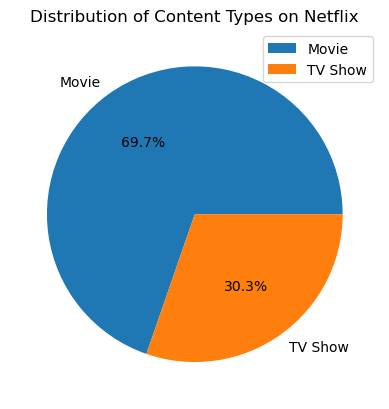

In [16]:
plt.pie(netflix_data["type"].value_counts(), labels=netflix_data["type"].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Content Types on Netflix')
plt.legend()
plt.show()

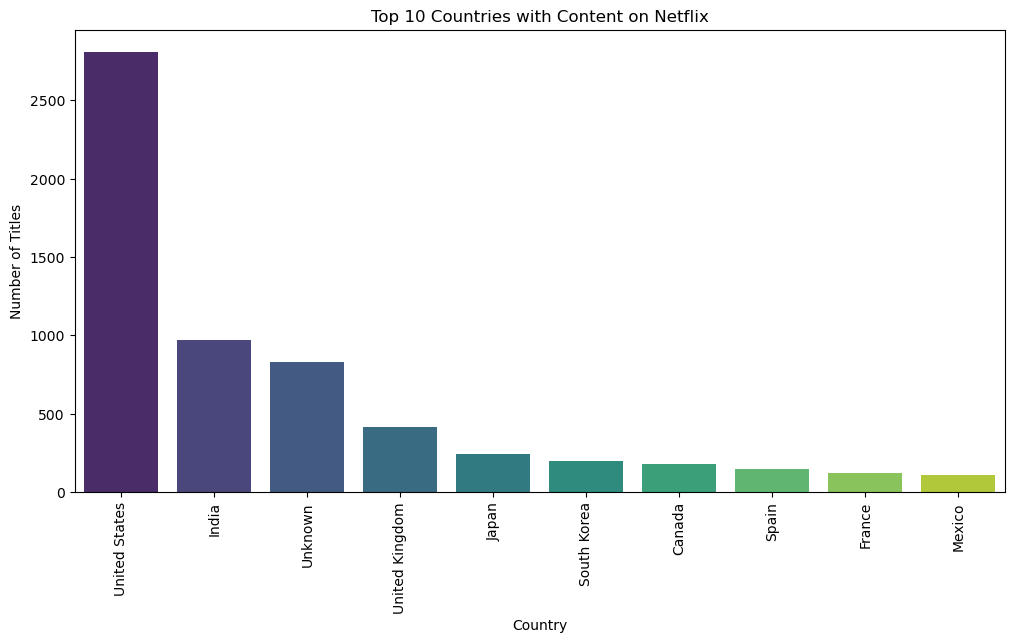

In [17]:
top_countries = netflix_data['country'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x="country", data=netflix_data[netflix_data['country'].isin(top_countries)], order=top_countries, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Countries with Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

In [18]:
netflix_data["director"].unique()

array(['Kirsten Johnson', 'Unknown', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [19]:
netflix_data["director"].value_counts().head(10)

director
Unknown                   2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: count, dtype: int64

In [20]:
group_by1=netflix_data.groupby("cast")["rating"].count().sort_values(ascending=False).head(10)
group_by1

cast
Unknown                                                                                                                   825
David Attenborough                                                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                    14
Samuel West                                                                                                                10
Jeff Dunham                                                                                                                 7
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath      6
David Spade, London Hughes, Fortune Feimster                                                                                6
Craig Sechler                                                                                                    

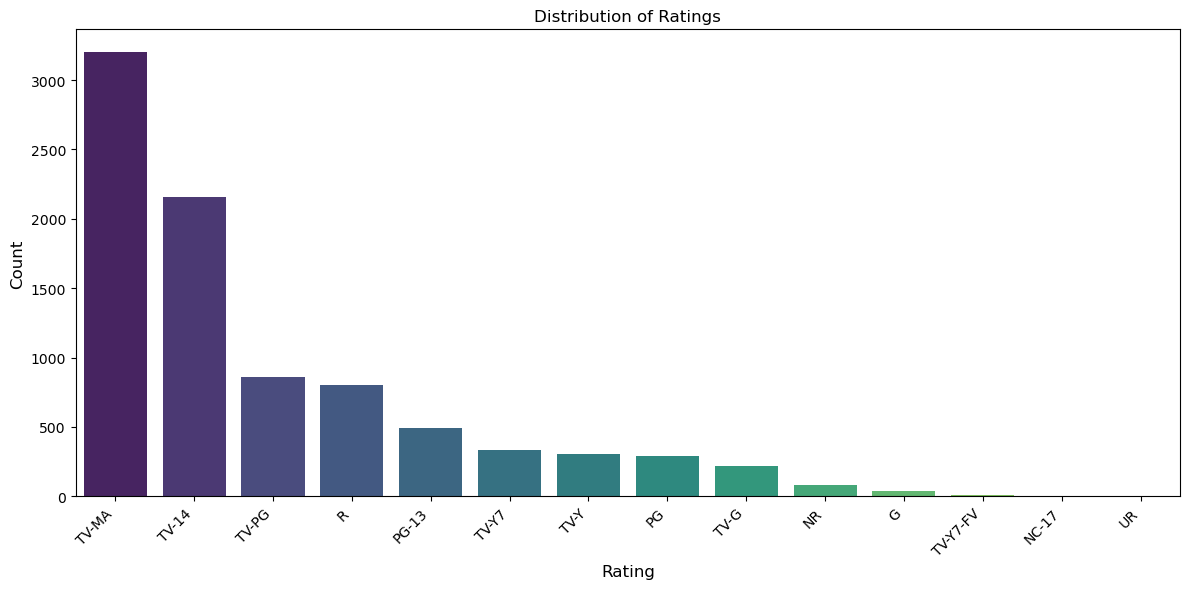

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x="rating", data=netflix_data, order=netflix_data['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
netflix_data["duration"].value_counts().head(10)

duration
1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: count, dtype: int64